[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_cmnd_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Function fit: tutorial

This notebook illustrates how **MultiMin** can be used to fit functions (not data) of one or many variables.

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


In [24]:
import multimin as mn
mn.show_watermark = True

import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

import numpy as np
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")

figprefix = "functions"

## The function

This data comes from the research in the Wow! signal:

In [25]:
%%file gallery/DSR-schema-TR_148.dat
tau,ISR
0.6097656250000227, 0.005664062500000178
85.88125000000002, 0.005395507812500533
157.19921875000006, 0.005170898437500515
203.70742187499997, 0.010693359375000266
225.40234375, 0.027631835937500515
239.32421875000006, 0.0786083984374999
247.01640625, 0.1749560546875002
254.69453125, 0.29397949218750075
259.24023437499994, 0.46403320312500007
265.30820312500003, 0.6794335937500002
272.8175781250001, 1.0705664062500004
278.7765625, 1.4617041015625
283.1746093750001, 1.8698535156250002
287.583203125, 2.26099609375
290.592578125, 2.4083789062500003
292.0867187500001, 2.4990771484375003
295.1453125, 2.5670947265625004
298.2250000000001, 2.6010986328125
301.346875, 2.5670751953125004
302.93945312500006, 2.4990429687500004
306.0894531249999, 2.4196679687500002
309.2816406250001, 2.272265625
315.72578125, 1.8810888671875003
320.63359375, 1.4672412109375004
323.9734374999999, 1.0817431640625002
333.52187499999997, 0.6848876953125003
336.75624999999997, 0.46945800781250036
343.059765625, 0.3050390625000001
347.7777343750001, 0.19731445312500018
352.4781249999999, 0.11793457031250032
360.26875, 0.05555175781250021
369.59570312499994, 0.01583984375000025
378.9085937500001, -0.0011962890624999112
392.8410156249999, 0.03277343749999995
403.655078125, 0.0950976562500001
412.90820312500006, 0.1744335937499999
422.14375, 0.2821142578125002
429.8289062500001, 0.3897998046875002
437.49999999999994, 0.5201611328125004
445.16406250000006, 0.6618603515625003
449.744921875, 0.7752246093750004
457.440625, 0.8659033203125004
462.06015625000003, 0.9169091796875004
468.2511718750001, 0.9338964843750004
474.47031250000015, 0.9055322265625003
479.14609375000003, 0.8658349609375007
486.94726562499994, 0.7864453125000006
494.77304687500003, 0.6673730468750003
502.61640625, 0.5199560546875004
510.45273437500003, 0.38387695312500014
521.38984375, 0.24778808593750012
536.974609375, 0.11735351562500052
554.078125, 0.03793457031250025
572.7074218750001, -0.0018066406249999112
592.8625000000002, -0.0018701171874999645
613.0035156250001, 0.02074218750000023
634.6878906250001, 0.054687500000000444
651.717578125, 0.09431640624999993
671.833984375, 0.1566113281249999
690.4000000000001, 0.21891113281249996
705.8828125, 0.2528759765625006
721.3832031249999, 0.25849609375000027
735.3437500000002, 0.24711425781250007
747.7609375, 0.2243994140625003
761.7390625, 0.18467285156250002
780.3753906250001, 0.13359375000000018
799.0082031250001, 0.08818359375000062
819.1878906250001, 0.04843749999999991
842.4613281249999, 0.020019531250000444
870.3789062500002, 0.0029248046875003375
906.0414062499999, -0.0028564453124997335
960.3050781249999, -0.003027343749999911
1026.9683593750003, 0.002431640625000675
1079.674609375, 0.013603515625000284
1174.24140625, 0.02464355468750057

Writing gallery/DSR-schema-TR_148.dat


In [26]:
kind = 'linear'
DSR148 = pd.read_csv('gallery/DSR-schema-TR_148.dat', sep=',', comment='#')
ISR148fun = interp1d(DSR148.tau, DSR148.ISR, kind=kind)

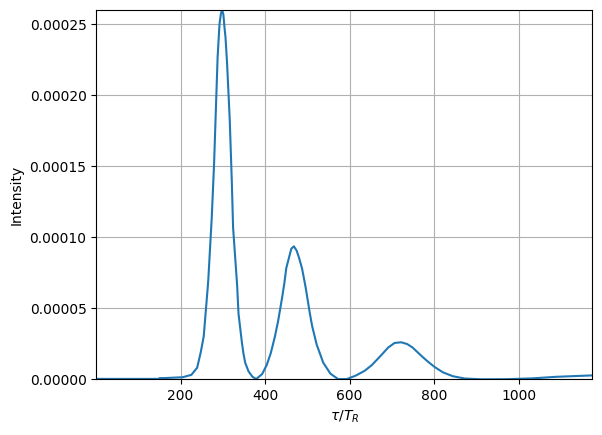

In [23]:
import numpy as np
import matplotlib.pyplot as plt
taus148 = np.linspace(DSR148.tau.iloc[0], DSR148.tau.iloc[-1],10000)
ISRs148 = ISR148fun(taus148)*1e-4
cond = taus148<150
ISRs148[cond] = 0

plt.plot(taus148,ISRs148)
plt.xlabel(r'$\tau/T_R$')
plt.ylabel(r'Intensity')
#plt.xlim(200,1000)
plt.margins(0)
plt.grid()

The goal is to fit the curves with gaussians.

In [ ]:
F = mn.FitCMND(data=(taus148, ISRs148), nvars=1, ngauss=3)

---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga